In [37]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.metrics import r2_score

In [38]:
df=pd.read_csv('smartphones_cleaned_v6.csv')
df.columns

Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

In [39]:

df=df[['brand_name','has_5g','processor_brand','battery_capacity','ram_capacity',"internal_memory",'price']]


In [40]:
df.head()

,brand_name,has_5g,processor_brand,battery_capacity,ram_capacity,internal_memory,price
0,oneplus,True,snapdragon,5000.0,12.0,256.0,54999
1,oneplus,True,snapdragon,5000.0,6.0,128.0,19989
2,samsung,True,exynos,5000.0,4.0,64.0,16499
3,motorola,True,snapdragon,5000.0,6.0,128.0,14999
4,realme,True,dimensity,5000.0,6.0,128.0,24999


In [41]:
x=df.drop(columns='price')
y=df.iloc[:,-1]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [43]:
x_train.head(4)

,brand_name,has_5g,processor_brand,battery_capacity,ram_capacity,internal_memory
481,sony,True,snapdragon,4000.0,8.0,128.0
974,vivo,True,snapdragon,4800.0,12.0,256.0
667,vivo,True,dimensity,5000.0,4.0,128.0
589,samsung,True,dimensity,5000.0,6.0,128.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        980 non-null    object 
 1   has_5g            980 non-null    bool   
 2   processor_brand   960 non-null    object 
 3   battery_capacity  969 non-null    float64
 4   ram_capacity      980 non-null    float64
 5   internal_memory   980 non-null    float64
 6   price             980 non-null    int64  
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 47.0+ KB


In [45]:
x_train.processor_brand.value_counts()

processor_brand
snapdragon    337
helio         155
dimensity     145
exynos         43
bionic         33
unisoc         24
tiger          18
google          7
kirin           3
spreadtrum      2
mediatek        1
fusion          1
sc9863a         1
Name: count, dtype: int64

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [47]:
transformer=ColumnTransformer(
    [
        ('ohe',OneHotEncoder(sparse_output=False,drop='first'),['brand_name','processor_brand']),
        ('ordinal',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1),['has_5g']),
        ('imputer',SimpleImputer(strategy='median'),['battery_capacity'])
        
    ],remainder='passthrough'
)
transformer.set_output(transform='pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['brand_name', 'processor_brand']),
                                ('ordinal',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['has_5g']),
                                ('imputer', SimpleImputer(strategy='median'),
                                 ['battery_capacity'])])

In [48]:
# x_train=transformer.fit_transform(x_train)
# x_test=transformer.transform(x_test)
x_train['battery_capacity'].median()

5000.0

In [36]:
x_test.shape

(196, 62)

In [50]:
# x_train=transformer.fit_transform(x_train)

rf=RandomForestRegressor(random_state=42)


In [ ]:
# y_pred=rf.predict(x_test)
# r2_score(y_test,y_pred)


0.7464213739610763

In [61]:
# x_test=transformer.transform(x_test)

In [62]:
# transformer.named_transformers_

In [63]:
# transformer.n_features_in_

In [64]:
# transformer.output_indices_

In [51]:
from sklearn.ensemble import RandomForestRegressor
clf=RandomForestRegressor()



In [53]:
# from sklearn.metrics import root_mean_squared_error 
# from sklearn.model_selection import cross_val_score
# from sklearn.pipeline import Pipeline
# # cross_val_score(clf,x_train,y_train,cv=5,scoring='r2').mean()
pipe=Pipeline([
    ("pre",transformer),
    ('model',clf)
])



In [54]:
import numpy as np
import pickle 
pickle.dump(pipe,open('pipe1.pkl','wb'))
# clf.predict(np.array(['sony',True,'snapdragon'	,4000.0	,8.0]).reshape(1,5))

In [55]:
model=pickle.load(open("pipe1.pkl",'rb'))
model.fit(x_train,y_train)

c:\Users\mdmuz\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['brand_name',
                                                   'processor_brand']),
                                                 ('ordinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['has_5g']),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['battery_capacity'])])),
                ('model', RandomForestRegressor())])

In [18]:
np.array(['sony',True,'snapdragon'	,4000.0	,8.0]).reshape(1,5)

array([['sony', 'True', 'snapdragon', '4000.0', '8.0']], dtype='<U32')

In [70]:
# ! pip install feature_engine
# ! pip install --upgrade scikit-learn


In [71]:
# model.fit(x_train,y_train)

In [72]:
# model.predict(x_test)




In [56]:
x=pd.DataFrame(np.array(["sony",True	,"snapdragon"	,5000,8,128]).reshape(1,6),columns=x_train.columns)
x

,brand_name,has_5g,processor_brand,battery_capacity,ram_capacity,internal_memory
0,sony,True,snapdragon,5000,8,128


In [57]:
x_train.shape

(784, 6)

In [ ]:
# rf_params = {
#     "model__n_estimators": [100,200,50],  # Number of trees in the forest
#     "model__max_depth": [None,4,6,5],  # Maximum depth of each tree
#     "model__min_samples_split": [2,3,5],  # Minimum samples required to split a node
#     "model__min_samples_leaf": [1,3,5],  # Minimum samples required at a leaf node
#     "model__max_features": ["sqrt",0.2,0.5]  # Number of features to consider when looking for the best split
# }


In [ ]:
# from sklearn.model_selection import GridSearchCV
# Grid=GridSearchCV(model,param_grid=rf_params,cv=5,verbose=2)

In [20]:
# Grid.fit(x_train,y_train)

In [ ]:
# Grid.best_params_

{'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 100}

In [58]:
pointestimate=model.predict(x)[0]
upper_range=pointestimate+1.96*(df['price'].std()/np.sqrt(784))

In [61]:
lower_range=pointestimate-1.96*(df['price'].std()/np.sqrt(784))

In [62]:
print(f'the specification you provide whose price lies b/w {lower_range} and {upper_range}')

the specification you provide whose price lies b/w 16250.65486318003 and 21785.108636819972


In [46]:
df

,brand_name,has_5g,processor_brand,battery_capacity,ram_capacity,internal_memory,price
0,oneplus,True,snapdragon,5000.0,12.0,256.0,54999
1,oneplus,True,snapdragon,5000.0,6.0,128.0,19989
2,samsung,True,exynos,5000.0,4.0,64.0,16499
3,motorola,True,snapdragon,5000.0,6.0,128.0,14999
4,realme,True,dimensity,5000.0,6.0,128.0,24999
...,...,...,...,...,...,...,...
975,motorola,True,snapdragon,5000.0,8.0,128.0,34990
976,honor,True,snapdragon,5000.0,6.0,128.0,14990
977,poco,True,dimensity,5080.0,8.0,256.0,28990
978,motorola,True,snapdragon,5000.0,6.0,128.0,19990


In [76]:
df.battery_capacity_filled=df.battery_capacity.fillna(df.battery_capacity.median())

In [79]:
list(df['battery_capacity'].unique())

[5000.0,
 3279.0,
 4980.0,
 4500.0,
 3240.0,
 4700.0,
 4830.0,
 4800.0,
 4323.0,
 3110.0,
 5200.0,
 6000.0,
 4325.0,
 4600.0,
 4200.0,
 3500.0,
 3095.0,
 4020.0,
 3200.0,
 4400.0,
 4310.0,
 4820.0,
 3700.0,
 5160.0,
 nan,
 5080.0,
 3900.0,
 4410.0,
 5020.0,
 2800.0,
 4352.0,
 4520.0,
 4810.0,
 4000.0,
 2050.0,
 2150.0,
 4610.0,
 5100.0,
 7000.0,
 4300.0,
 5500.0,
 4050.0,
 4355.0,
 3060.0,
 5003.0,
 2438.0,
 4250.0,
 3300.0,
 4450.0,
 4614.0,
 4870.0,
 4030.0,
 4350.0,
 4100.0,
 21000.0,
 4860.0,
 2275.0,
 4230.0,
 1900.0,
 3020.0,
 4730.0,
 3520.0,
 4080.0,
 5050.0,
 5600.0,
 4470.0,
 3360.0,
 3000.0,
 2230.0,
 9800.0,
 1821.0,
 4015.0,
 3285.0,
 4360.0,
 3315.0,
 2000.0,
 3600.0,
 3100.0,
 22000.0,
 2400.0,
 2500.0,
 4532.0,
 5065.0,
 4620.0,
 4780.0,
 3730.0,
 3400.0,
 2730.0,
 5180.0,
 8000.0]

In [ ]:
! pip install missingno

In [3]:
import missingno as msno

c:\Users\mdmuz\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<Axes: >

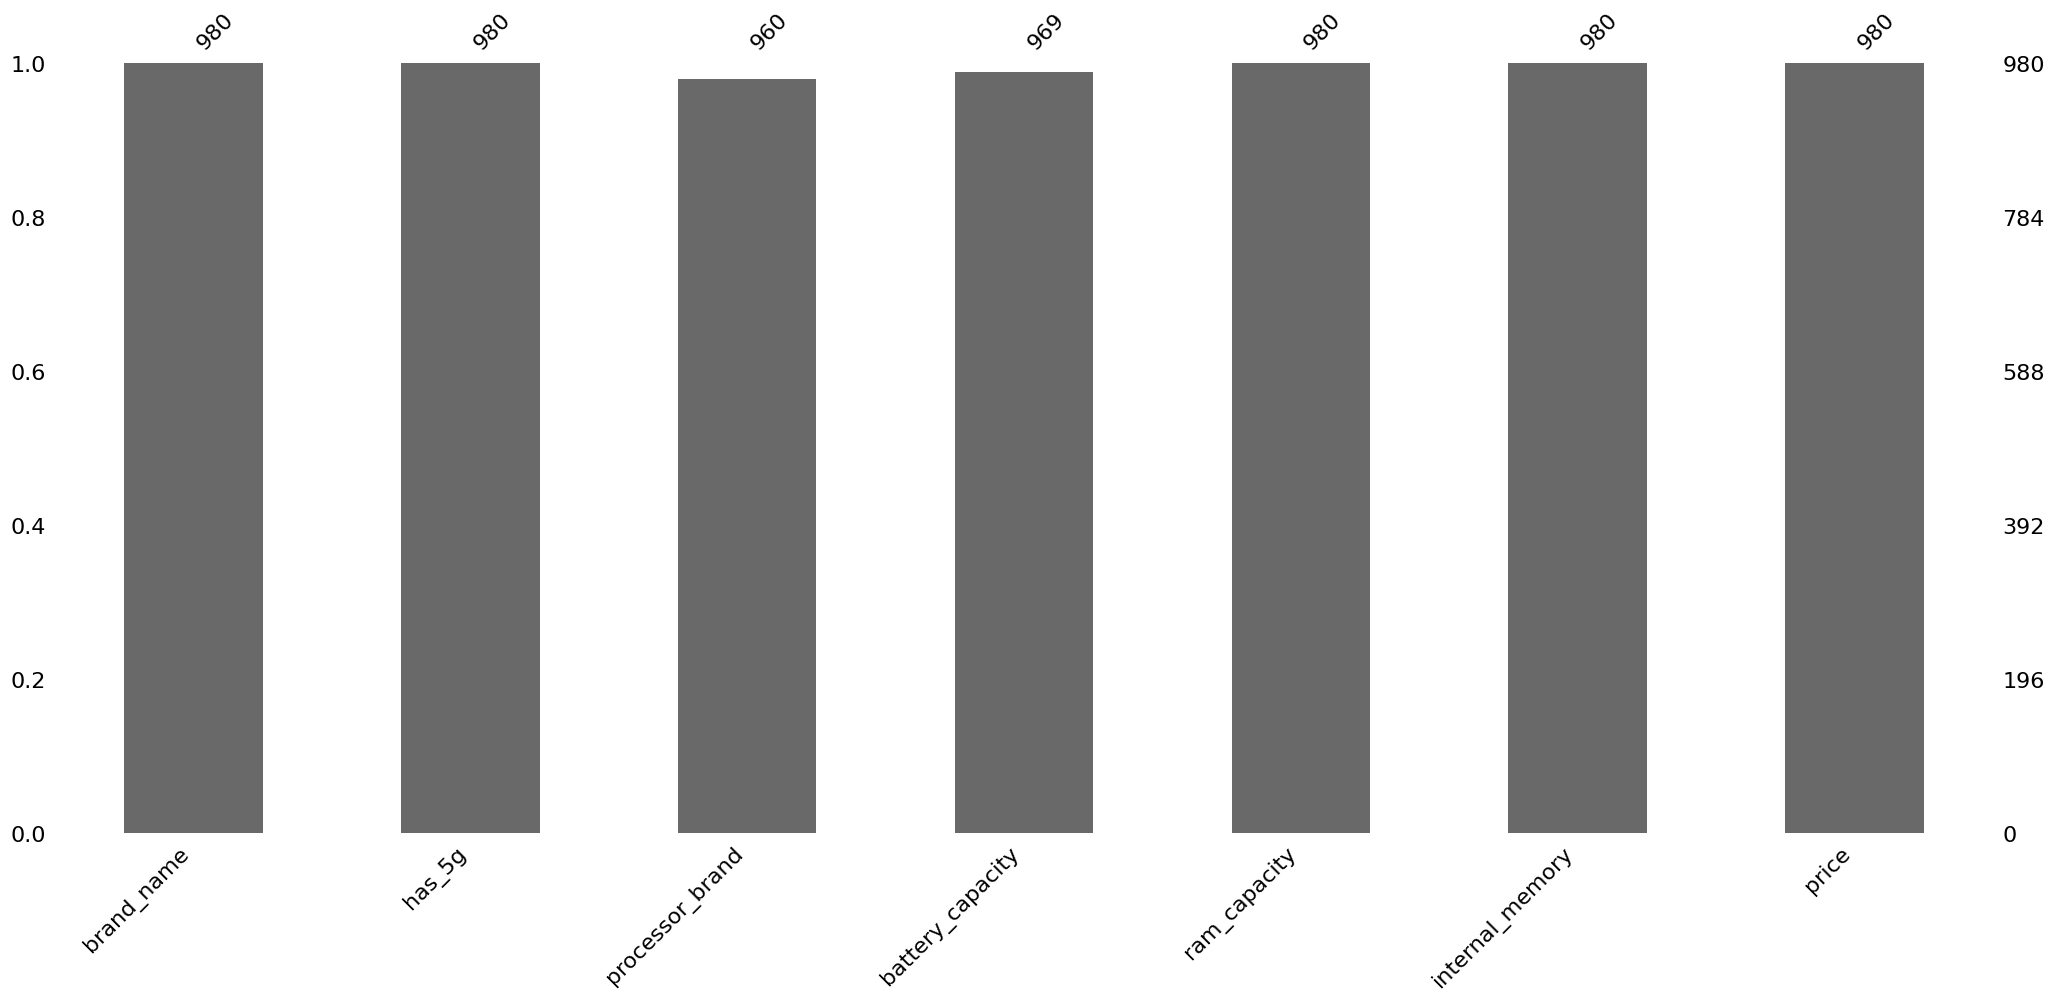

In [7]:
msno.bar(df)

<Axes: >

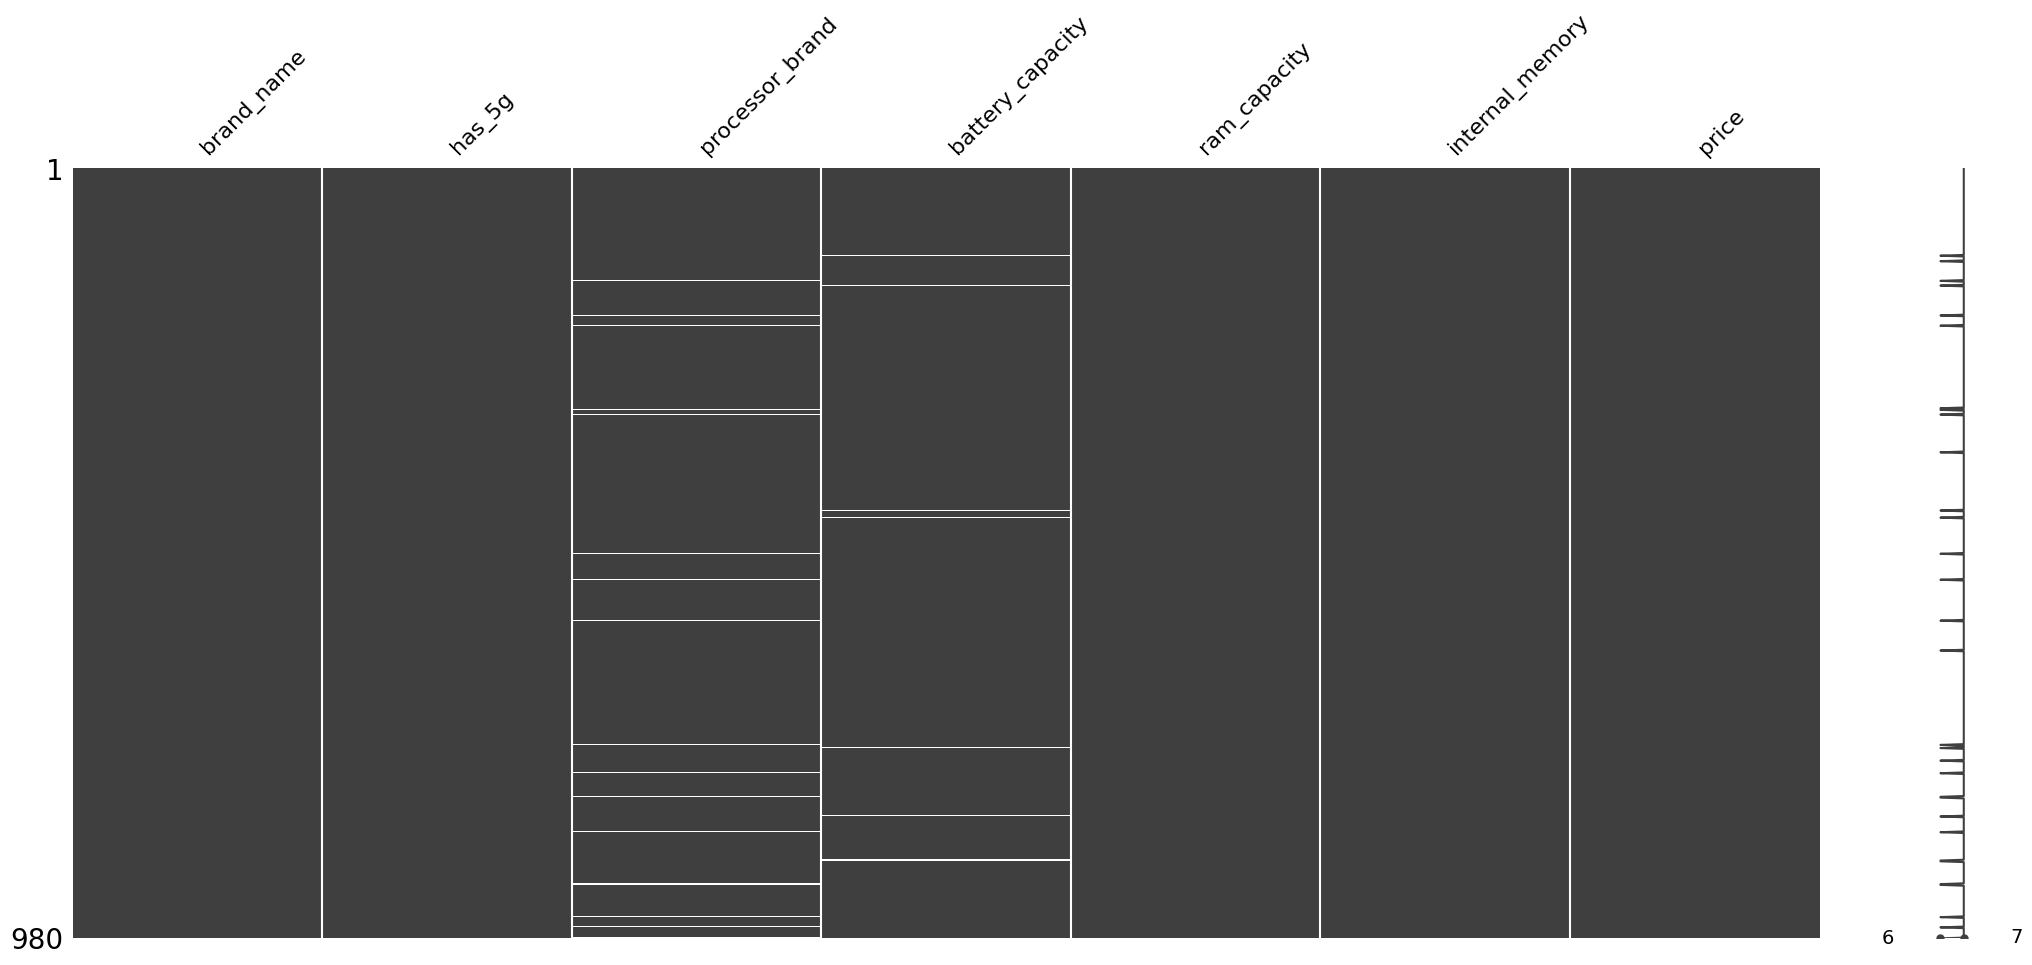

In [10]:
msno.matrix(df)


<Axes: >

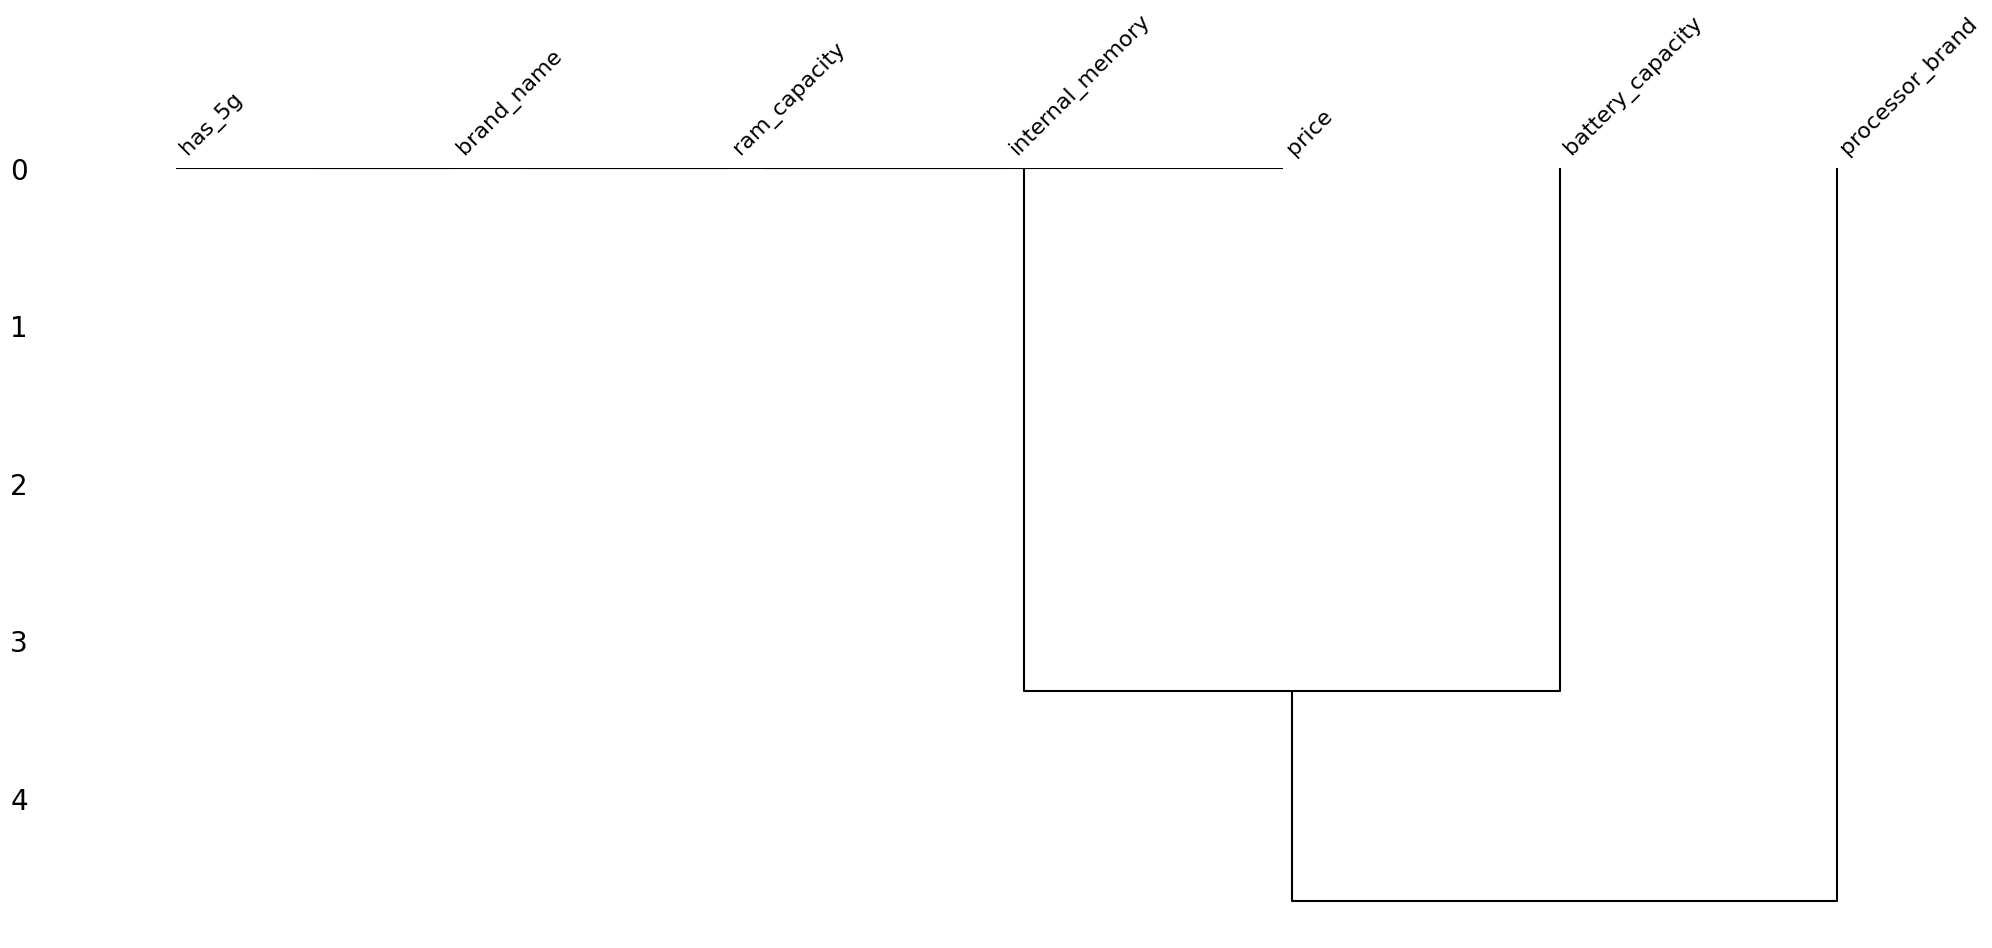

In [11]:
msno.dendrogram(df)